In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
        
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [6]:
# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in groups of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
# If an error is experience, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zeya
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | carballo
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | quelimane
Processing Record 15 of Set 1 | bartica
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | cedar city
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | wenatchee
Processin

Processing Record 34 of Set 4 | jacareacanga
Processing Record 35 of Set 4 | lac-megantic
Processing Record 36 of Set 4 | lagoa vermelha
Processing Record 37 of Set 4 | aklavik
Processing Record 38 of Set 4 | santa luzia
Processing Record 39 of Set 4 | bodden town
Processing Record 40 of Set 4 | noumea
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | namie
Processing Record 43 of Set 4 | vestmanna
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | gidole
Processing Record 46 of Set 4 | san carlos de bariloche
Processing Record 47 of Set 4 | vizinga
Processing Record 48 of Set 4 | morondava
Processing Record 49 of Set 4 | ocos
Processing Record 50 of Set 4 | basco
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | eyl
Processing Record 3 of Set 5 | acari
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | londonderry
Processing Record 7 of Set 5 | slave lake
Proce

Processing Record 26 of Set 8 | maceio
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | prachuap khiri khan
Processing Record 29 of Set 8 | esperance
Processing Record 30 of Set 8 | prince rupert
Processing Record 31 of Set 8 | baruun-urt
Processing Record 32 of Set 8 | babanusah
City not found. Skipping...
Processing Record 33 of Set 8 | tari
Processing Record 34 of Set 8 | santiago del estero
Processing Record 35 of Set 8 | faanui
Processing Record 36 of Set 8 | jalu
Processing Record 37 of Set 8 | shaowu
Processing Record 38 of Set 8 | brigantine
Processing Record 39 of Set 8 | kashary
Processing Record 40 of Set 8 | maragogi
Processing Record 41 of Set 8 | lavrentiya
Processing Record 42 of Set 8 | suzu
City not found. Skipping...
Processing Record 43 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 8 | yabrud
Processing Record 45 of Set 8 | ahmadpur east
Processing Record 46 of Set 8 | kismayo
Processing Record 47 of S

Processing Record 16 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 18 of Set 12 | yumen
Processing Record 19 of Set 12 | udankudi
Processing Record 20 of Set 12 | nome
Processing Record 21 of Set 12 | warqla
City not found. Skipping...
Processing Record 22 of Set 12 | dawei
Processing Record 23 of Set 12 | altea
Processing Record 24 of Set 12 | ketchikan
Processing Record 25 of Set 12 | datong
Processing Record 26 of Set 12 | lorengau
Processing Record 27 of Set 12 | sikeston
Processing Record 28 of Set 12 | honningsvag
Processing Record 29 of Set 12 | pali
Processing Record 30 of Set 12 | olinda
Processing Record 31 of Set 12 | wanaka
Processing Record 32 of Set 12 | ler
Processing Record 33 of Set 12 | ayios nikolaos
Processing Record 34 of Set 12 | dharchula
Processing Record 35 of Set 12 | teya
Processing Record 36 of Set 12 | chilca
Processing Record 37 of Set 12 | nuqui
Processing Reco

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zeya,53.7500,127.2667,34.45,48,17,18.32,RU,2021-04-19 03:46:24
1,East London,-33.0153,27.9116,73.40,31,0,14.97,ZA,2021-04-19 03:44:42
2,Punta Arenas,-53.1500,-70.9167,44.60,87,0,5.75,CL,2021-04-19 03:44:57
3,Carballo,43.2130,-8.6910,53.01,89,100,3.15,ES,2021-04-19 03:46:24
4,Castro,-24.7911,-50.0119,54.93,97,31,5.95,BR,2021-04-19 03:46:25
5,Kapaa,22.0752,-159.3190,77.00,65,75,12.66,US,2021-04-19 03:46:25
6,Ushuaia,-54.8000,-68.3000,50.00,76,90,16.11,AR,2021-04-19 03:46:26
7,Rikitea,-23.1203,-134.9692,78.04,71,8,4.61,PF,2021-04-19 03:43:26
8,Busselton,-33.6500,115.3333,68.00,75,54,1.99,AU,2021-04-19 03:44:54
9,Mar Del Plata,-38.0023,-57.5575,64.99,94,0,6.91,AR,2021-04-19 03:45:00


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zeya,RU,2021-04-19 03:46:24,53.7500,127.2667,34.45,48,17,18.32
1,East London,ZA,2021-04-19 03:44:42,-33.0153,27.9116,73.40,31,0,14.97
2,Punta Arenas,CL,2021-04-19 03:44:57,-53.1500,-70.9167,44.60,87,0,5.75
3,Carballo,ES,2021-04-19 03:46:24,43.2130,-8.6910,53.01,89,100,3.15
4,Castro,BR,2021-04-19 03:46:25,-24.7911,-50.0119,54.93,97,31,5.95
5,Kapaa,US,2021-04-19 03:46:25,22.0752,-159.3190,77.00,65,75,12.66
6,Ushuaia,AR,2021-04-19 03:46:26,-54.8000,-68.3000,50.00,76,90,16.11
7,Rikitea,PF,2021-04-19 03:43:26,-23.1203,-134.9692,78.04,71,8,4.61
8,Busselton,AU,2021-04-19 03:44:54,-33.6500,115.3333,68.00,75,54,1.99
9,Mar Del Plata,AR,2021-04-19 03:45:00,-38.0023,-57.5575,64.99,94,0,6.91


In [10]:
# Create the output file
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv file
city_data_df.to_csv(output_data_file, index_label="City ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


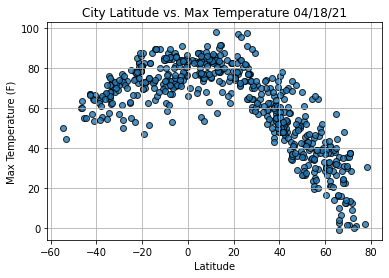

In [12]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

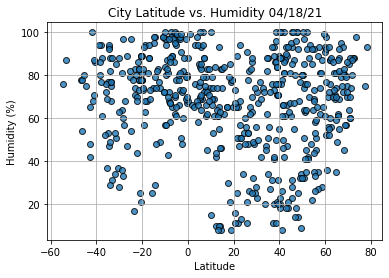

In [13]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

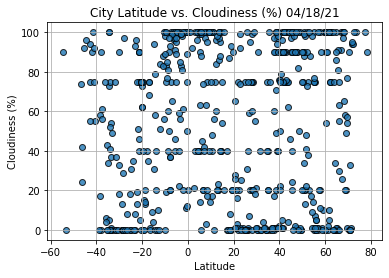

In [14]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

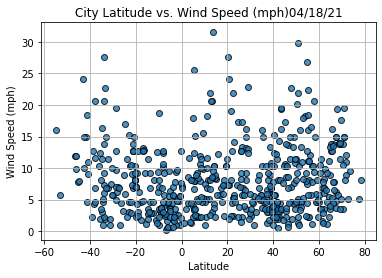

In [15]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="k", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph)"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

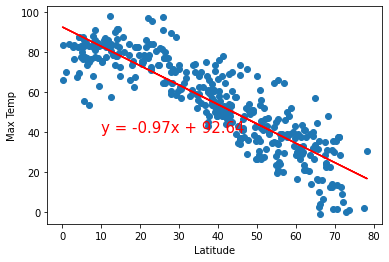

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

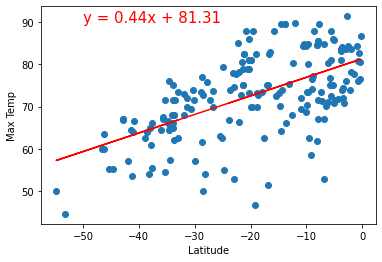

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

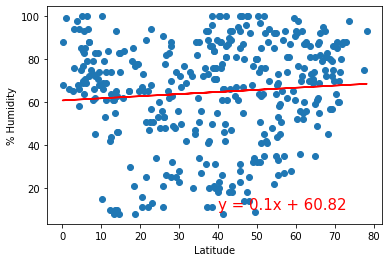

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40, 10))

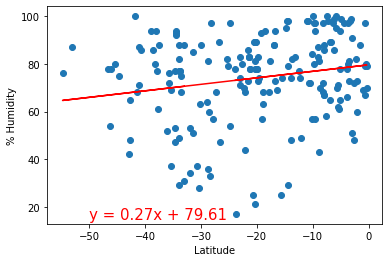

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50, 15))

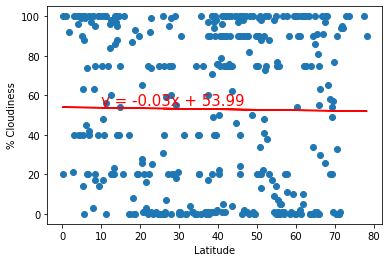

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 55))

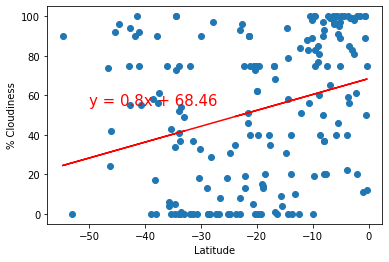

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50, 55))

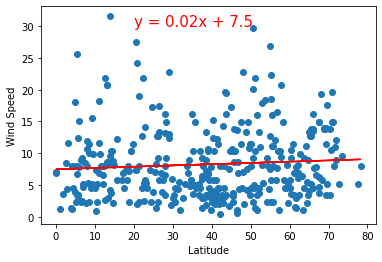

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20, 30))

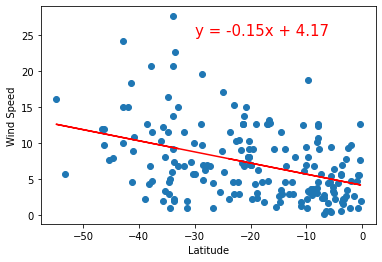

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30, 25))